In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mpmath as mp
import Time_approximations as Ta
from functools import partial
from scipy.integrate import quad

from singlelocusmodelextended import SingleLocusModelExt
modelext = SingleLocusModelExt(k=1)

In [15]:
array_csv=np.loadtxt('posterior_samples.csv', delimiter=",", skiprows=1, usecols=(1,2,3,4,5) , dtype='Float64',)

In [3]:
def simTP(μ, δ, w1, w2, w3, repetition=50, max_gen=5e6, seed=10, fixation=0.999):
    return modelext.run_simulations(6.425e6, μ, δ, δ,
 w1, w2, w3, repetitions=50, max_gen=5e4 ,seed=seed, clonal_intf=True, fixation=fixation)

In [4]:
f_sim_1=simTP(*array_csv[13])

In [5]:
f_sim_1[2]

(array([], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       dtype=int64))

<AxesSubplot:>

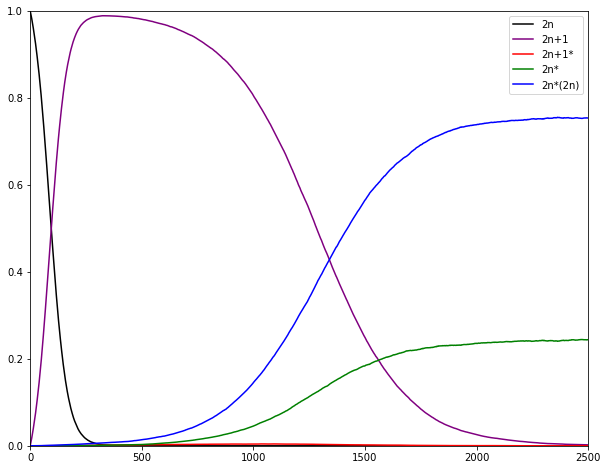

In [7]:
modelext.plot_progress(np.array(f_sim_1[1]), 22, ['2n','2n+1','2n+1*','2n*','2n*(2n)'], ['black','purple','red','green','blue'],fixation=0.99, xlim=(0,2500))

In [7]:
 μ, δ, w_euwt, w_anwt, w_anmt, w_eumt = 9.6e-08, 5.4e-4, 1, 1.021, 1.025, 1.028

In [8]:
sim0=modelext.run_simulations(6.425e6, μ, δ, δ, 
 w_anwt, w_anmt, w_eumt, repetitions=50, max_gen=5e4 , seed=1, fixation=.99)

In [9]:
sim1=modelext.run_simulations_time(6.425e6, μ, δ, δ,
 w_anwt, w_anmt, w_eumt, repetitions=50, max_gen=5e4 ,seed=1, fixation=.99)

In [10]:
sim0[0]==sim1[0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [12]:
sim0[2], sim1[1]

((array([28], dtype=int64),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 33, 34, 35,
         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        dtype=int64)),
 (array([28], dtype=int64),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 33, 34, 35,
         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        dtype=int64)))

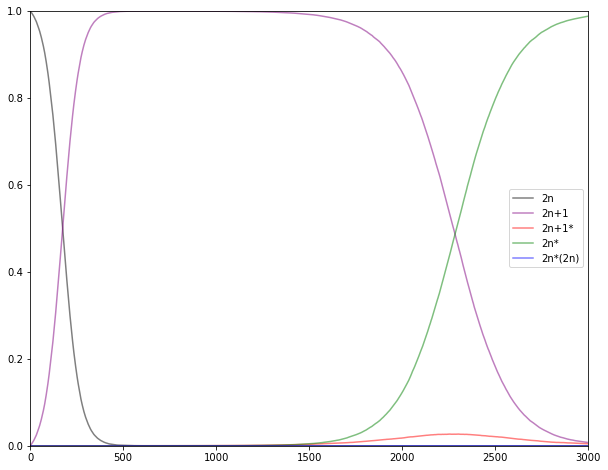

In [14]:
modelext.plot_progress(np.array(sim0[1]), 32, ['2n','2n+1','2n+1*','2n*','2n*(2n)'], ['black','purple','red','green','blue'],fixation=0.99, alpha=.5, xlim=(0,3000));

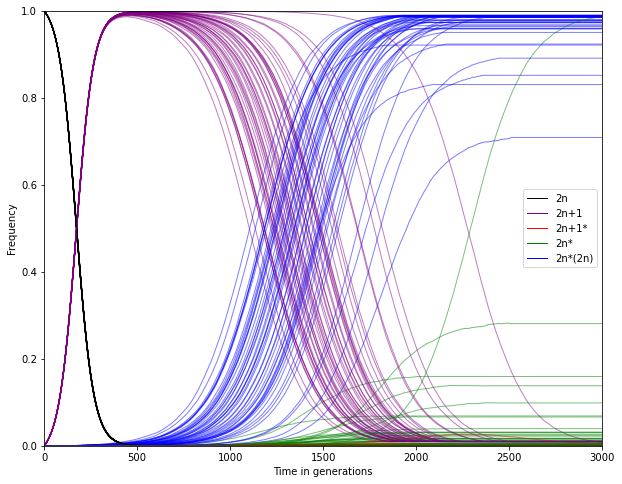

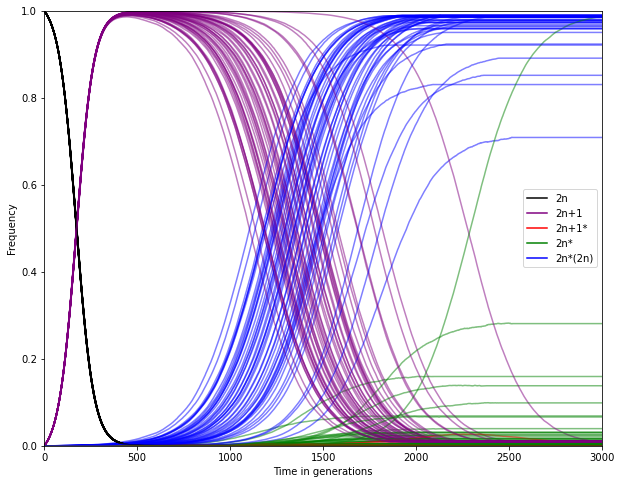

In [16]:
ax=modelext.plot_progress(np.array(sim0[1]), 0, ['2n','2n+1','2n+1*','2n*','2n*(2n)'], ['black','purple','red','green','blue'],fixation=0.99, alpha=.5, xlim=(0,3000),lw=1)
[modelext.plot_progress(np.array(sim0[1]), x, ['2n','2n+1','2n+1*','2n*','2n*(2n)'], ['black','purple','red','green','blue'],fixation=0.99, ax=ax, alpha=.5, legend=False, lw=1) for x in range(1,50)]
ax=modelext.plot_progress(np.array(sim0[1]), 0, ['2n','2n+1','2n+1*','2n*','2n*(2n)'], ['black','purple','red','green','blue'],fixation=0.99, alpha=.5, xlim=(0,3000))
[modelext.plot_progress(np.array(sim0[1]), x, ['2n','2n+1','2n+1*','2n*','2n*(2n)'], ['black','purple','red','green','blue'],fixation=0.99, ax=ax, alpha=.5, legend=False) for x in range(1,50)];

In [55]:
idx = np.random.choice(np.shape(array_csv)[0], size=500, replace=True)
#array_csv[idx]

In [6]:
sim_sam100P=np.array([simTP(*a) for a in array_csv[idx]])

<ipython-input-6-473e11b983e1>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  sim_sam100P=np.array([simTP(*a) for a in array_csv[idx]])


In [4]:
np.save('sim_sam100P',(idx,array_csv[idx],np.array(sim_sam100P, dtype=object).T))

NameError: name 'idx' is not defined

In [2]:
idxs, paras, sim_sam100P = np.load('sim_sam100P.npy',allow_pickle=True)
sim_sam100P=sim_sam100P.T

In [56]:
sim_sam500P=np.array([simTP(*a) for a in array_csv[idx]])

<ipython-input-56-6e4d6dcf0892>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  sim_sam500P=np.array([simTP(*a) for a in array_csv[idx]])


In [59]:
np.save('sim_sam500P',(idx,array_csv[idx],np.array(sim_sam500P.T, dtype=object)))

MemoryError: 

In [5]:
idxs5, paras5, sim_sam500P = np.load('sim_sam500P.npy',allow_pickle=True)
sim_sam500P=sim_sam500P.T

EOFError: Ran out of input

In [63]:
np.savez_compressed('sim_sam500Pz',a=idx_500,b=array_csv[idx],c=sim_sam500P, allow_pickle=True)

MemoryError: 

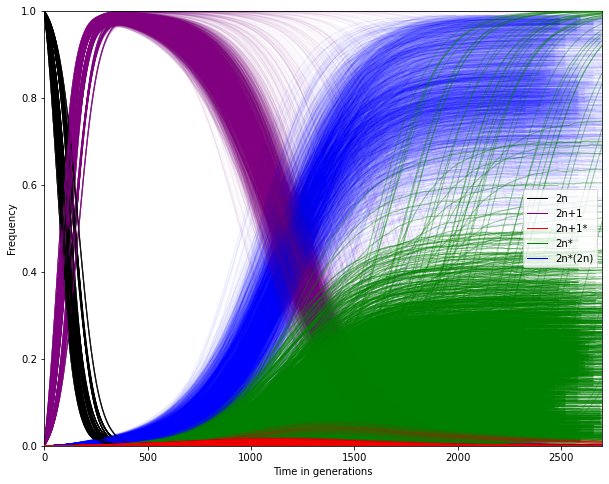

In [3]:
idxplot = np.random.choice(100, size=50, replace=False)
ax=modelext.plot_progress(np.array(sim_sam100P[0,1]), 0, ['2n','2n+1','2n+1*','2n*','2n*(2n)'], ['black','purple','red','green','blue'],fixation=0.99, alpha=.05, legend=True, xlim=(0,2700), g_o=True, lw=1)
[[modelext.plot_progress(np.array(sim_sam100P[y,1]), x, ['2n','2n+1','2n+1*','2n*','2n*(2n)'], ['black','purple','red','green','blue'],fixation=0.99, ax=ax, alpha=.05, legend=False, g_o=True, lw=1) for x in range(50)] for y in idxplot]
plt.savefig('progress5x50x50_6.pdf');

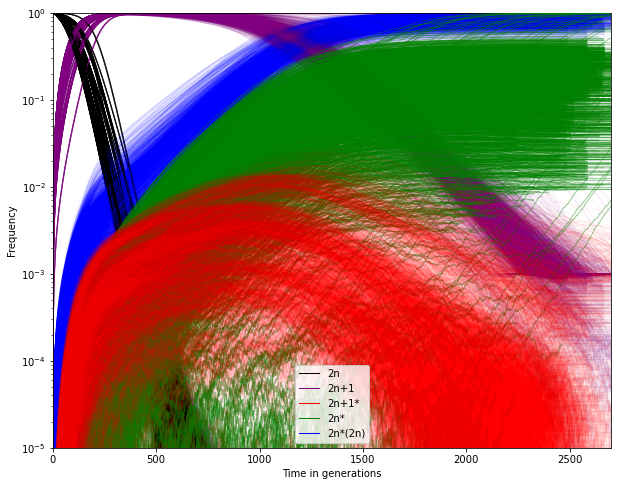

In [6]:
idxplot = np.random.choice(100, size=50, replace=False)
ax=modelext.plot_progress(np.array(sim_sam100P[0,1]), 0, ['2n','2n+1','2n+1*','2n*','2n*(2n)'], ['black','purple','red','green','blue'],fixation=0.99, alpha=.05, legend=True, xlim=(0,2700), ylim=(1e-5,1), g_o=True, lw=1,logscale=True)
[[modelext.plot_progress(np.array(sim_sam100P[y,1]), x, ['2n','2n+1','2n+1*','2n*','2n*(2n)'], ['black','purple','red','green','blue'],fixation=0.99, ax=ax, alpha=.05, legend=False, ylim=(1e-5,1), g_o=True, lw=1) for x in range(50)] for y in idxplot]
plt.savefig('progress5x50x50_log.pdf');

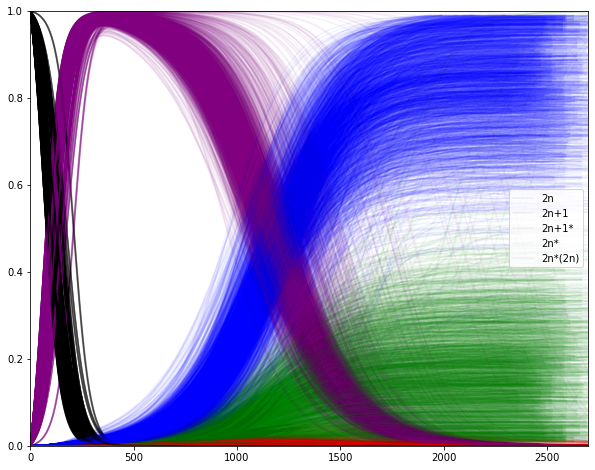

In [18]:
idxplot = np.random.choice(50, size=25, replace=False)
ax=modelext.plot_progress(np.array(sim_sam100P[0,1]), 0, ['2n','2n+1','2n+1*','2n*','2n*(2n)'], ['black','purple','red','green','blue'],fixation=0.99, alpha=.05, legend=True, xlim=(0,2700))
[[modelext.plot_progress(np.array(sim_sam100P[y,1]), x, ['2n','2n+1','2n+1*','2n*','2n*(2n)'], ['black','purple','red','green','blue'],fixation=0.99, ax=ax, alpha=.05, legend=False) for x in idxplot] for y in range(100)]
plt.savefig('progress5x100x25_0.pdf');

In [24]:
fig=np.load('progress5x50x50_6.pdf')

ValueError: Cannot load file containing pickled data when allow_pickle=False

In [9]:
sim_sam100P[0,0]

array([2397., 2414., 2385., 2443., 2426., 2402., 2410., 2445., 2413.,
       2420., 2475., 2350., 2420., 2430., 2427., 2457., 2491., 2339.,
       2405., 2357., 2453., 2468., 2357., 2408., 2366., 2446., 2411.,
       2388., 2418., 2465., 2357., 2490., 2393., 2411., 2468., 2500.,
       2535., 2484., 2442., 2401., 2432., 2399., 2432., 2417., 2374.,
       2402., 2361., 2454., 2349., 2392.])

In [9]:
means=np.array([np.mean(np.array(sim_sam100P[x,1]).T[:,3,-1]) for x in range(100)])


In [41]:
plt.scatter

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)>

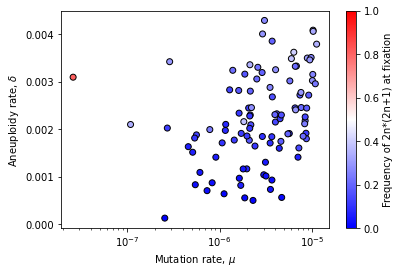

In [10]:
plt.scatter(paras[:,0],paras[:,1], c=means, cmap="bwr", vmin=0, vmax=1, ec='k')
plt.colorbar(label='Frequency of 2n*(2n+1) at fixation')
plt.xscale('log')
plt.xlabel('Mutation rate, $\mu$')
plt.ylabel('Aneuploidy rate, $\delta$')
plt.savefig('scatter100.pdf');
#plt.cm.

In [23]:
means.argmax(),means.max()

(20, 0.8102839688715953)

In [66]:
fixation_values_500=np.array([np.array([np.array(sim_sam500P[x,1]).T[:,y,-1] for x in range(500)]) for y in range(0,5)])

In [69]:
np.save('fixation_values_500',(idx, array_csv[idx], fixation_values_500))

In [11]:
idx500, array_500, fv_500=np.load('fixation_values_500.npy',allow_pickle=True)

In [12]:
means500=np.mean(fv_500[3],axis=1)

In [14]:
means500.argmax(),means500.max(),array_500[means500.argmax()]

(383,
 0.9390696653696499,
 array([9.74763322e-10, 4.68601492e-03, 1.01724395e+00, 1.02169103e+00,
        1.02426859e+00]))

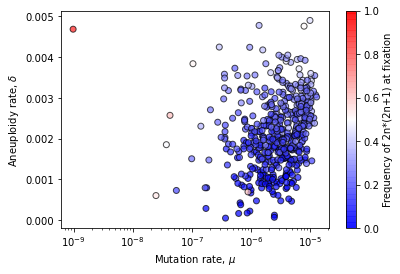

In [22]:
plt.scatter(array_500[:,0],array_500[:,1], c=means500, cmap="bwr", vmin=0, vmax=1, ec='k', alpha=0.7)
plt.colorbar(label='Frequency of 2n*(2n+1) at fixation')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Mutation rate, $\mu$')
plt.ylabel('Aneuploidy rate, $\delta$')
plt.savefig('scatter500.pdf');

In [20]:
np.mean(means500), np.std(means500)

(0.17452651292762647, 0.11204506031521204)

(array([16., 27., 19., 22., 37., 49., 28., 32., 31., 27., 44., 25., 35.,
        22., 19., 18.,  8.,  7.,  4.,  5.,  6.,  3.,  0.,  3.,  2.,  4.,
         2.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([4.73712062e-05, 1.88278171e-02, 3.76082630e-02, 5.63887089e-02,
        7.51691547e-02, 9.39496006e-02, 1.12730047e-01, 1.31510492e-01,
        1.50290938e-01, 1.69071384e-01, 1.87851830e-01, 2.06632276e-01,
        2.25412722e-01, 2.44193168e-01, 2.62973614e-01, 2.81754059e-01,
        3.00534505e-01, 3.19314951e-01, 3.38095397e-01, 3.56875843e-01,
        3.75656289e-01, 3.94436735e-01, 4.13217181e-01, 4.31997627e-01,
        4.50778072e-01, 4.69558518e-01, 4.88338964e-01, 5.07119410e-01,
        5.25899856e-01, 5.44680302e-01, 5.63460748e-01, 5.82241194e-01,
        6.01021639e-01, 6.19802085e-01, 6.38582531e-01, 6.57362977e-01,
        6.76143423e-01, 6.94923869e-01, 7.13704315e-01, 7.32484761e-

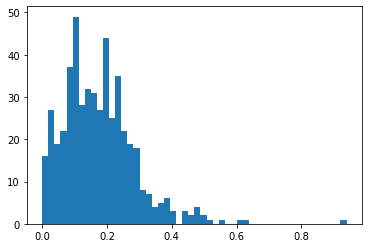

In [22]:
plt.hist(means500, 50)

In [32]:
np.array([np.mean(np.array(sim_sam100P[0,1]).T[:,3,-1]) for x in range(500)])

0.8434992840466926

In [33]:
np.mean(np.array(sim_sam100P[0,1]).T[:,3,-1])+np.mean(np.array(sim_sam100P[0,1]).T[:,4,-1])

0.9990089151750973